### Load libraries

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

plt.style.use('seaborn-darkgrid')

In [3]:
sys.path.append("../..")
from src.utils import runs_to_df

### teacher = 4-2-1

In [6]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/student-teacher-v2",
    filters={"tags": {"$in": ["overparam-scaling-4-2-1-try3"]}},
)
# "overparam-scaling-4-2-1" (AdamW weight decay = 5e-4)
# "overparam-scaling-4-2-1-try2" (SGD weight decay = 5e-4)

df_all = runs_to_df(runs)
df = df_all[
    (df_all.state == "finished")
]
len(df)

392

In [7]:
print(df.optimizer.unique())
print(df.weight_decay.unique())

['OptimizerT.AdamW']
[0]


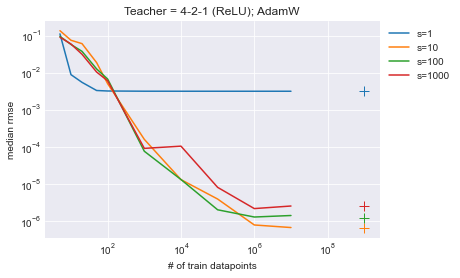

In [8]:
max_x = df.n_train.max()
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.AdamW") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .median()
    )
    assert cdf.n_train.iloc[0] == -1
    rmse_infty = cdf.test_rmse.iloc[0]

    p = plt.plot(cdf.n_train[1:], cdf.test_rmse[1:], label=f"{s=}")
    plt.plot(100 * max_x, rmse_infty, marker="+", markersize=10, color=p[0].get_color())

plt.title("Teacher = 4-2-1 (ReLU); AdamW")
plt.ylabel("median rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

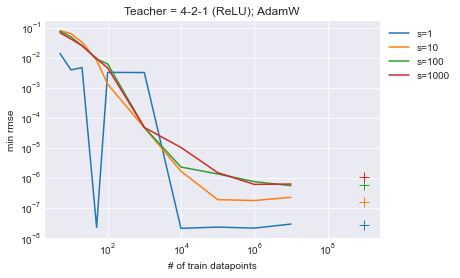

In [9]:
max_x = df.n_train.max()
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.AdamW") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .min()
    )
    assert cdf.n_train.iloc[0] == -1
    rmse_infty = cdf.test_rmse.iloc[0]

    p = plt.plot(cdf.n_train[1:], cdf.test_rmse[1:], label=f"{s=}")
    plt.plot(100 * max_x, rmse_infty, marker="+", markersize=10, color=p[0].get_color())

plt.title("Teacher = 4-2-1 (ReLU); AdamW")
plt.ylabel("min rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

### teacher = 8-96-192-1

In [10]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/student-teacher-v2",
    filters={"tags": {"$in": ["double-scaling-8-96-192-1"]}},
)

df_all = runs_to_df(runs)
df = df_all[
    (df_all.state == "finished")
]
len(df)

133

In [11]:
print(df.optimizer.unique())
print(df.weight_decay.unique())

['OptimizerT.AdamW']
[0]


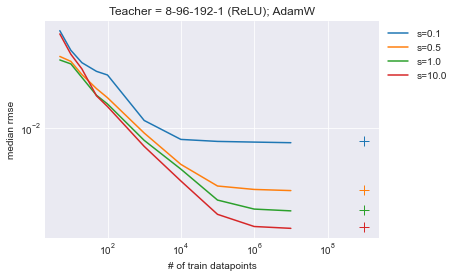

In [13]:
max_x = df.n_train.max()
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.AdamW") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .median()
    )
    if cdf.n_train.iloc[0] != -1: continue
    rmse_infty = cdf.test_rmse.iloc[0]

    p = plt.plot(cdf.n_train[1:], cdf.test_rmse[1:], label=f"{s=}")
    plt.plot(100 * max_x, rmse_infty, marker="+", markersize=10, color=p[0].get_color())

plt.title("Teacher = 8-96-192-1 (ReLU); AdamW")
plt.ylabel("median rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

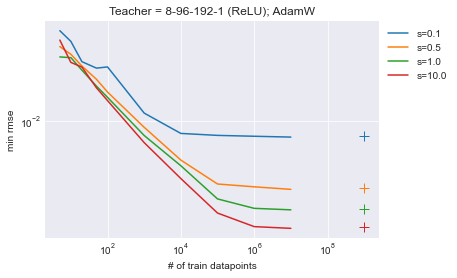

In [14]:
max_x = df.n_train.max()
for s in sorted(df.student_width_scale_factor.unique()):
    cdf = (
        df[(df.optimizer == "OptimizerT.AdamW") & (df.student_width_scale_factor == s)]
        .sort_values("n_train")
        .groupby("n_train", as_index=False)
        .min()
    )
    if cdf.n_train.iloc[0] != -1: continue
    rmse_infty = cdf.test_rmse.iloc[0]

    p = plt.plot(cdf.n_train[1:], cdf.test_rmse[1:], label=f"{s=}")
    plt.plot(100 * max_x, rmse_infty, marker="+", markersize=10, color=p[0].get_color())

plt.title("Teacher = 8-96-192-1 (ReLU); AdamW")
plt.ylabel("min rmse")
plt.xlabel("# of train datapoints")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));